In [2]:
from google.colab import files
uploaded = files.upload()



Saving netflix_titles.csv to netflix_titles (1).csv


## 🧹 Step 2: Import Libraries and Load Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

df = pd.read_csv("netflix_titles.csv")

# Show first five rows

print(df.head())



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# 🔍 Step 3: Explore the Dataset

In [11]:
# Check info about the dataset
df.info()

# Check missing values
print(df.isnull().sum())

# Basic stats
print(df.describe())

# Unique types of content
print(df['type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0


# 🔍 Step 3: Explore the Dataset
Remove unnecessary columns or fill missing values.

In [13]:
df = df.fillna({'country': 'Unknown', 'rating': 'Unknown', 'date_added': 'Unknown'})


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# 📊 Step 5: Analysis and Visualization
1️⃣ Movies vs TV Shows

/tmp/ipython-input-1880080647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


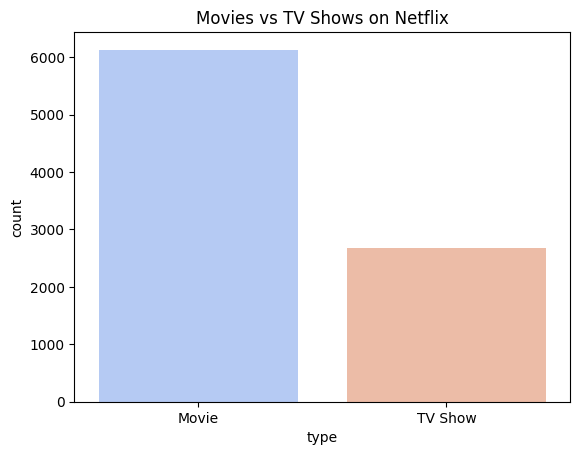

In [15]:
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


# 2️⃣ Top 10 Genres

/tmp/ipython-input-3138019946.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


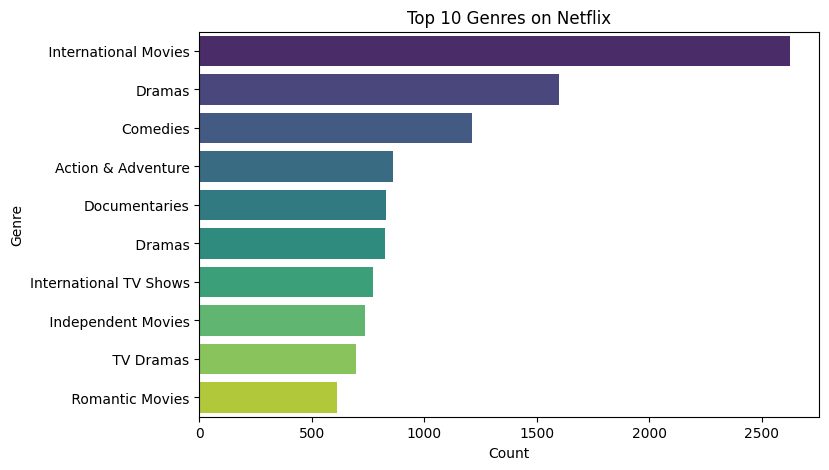

In [16]:
# Split and count genres
df['listed_in'] = df['listed_in'].astype(str)
all_genres = df['listed_in'].str.split(',').explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


# **3️⃣ Content Growth Over Time**

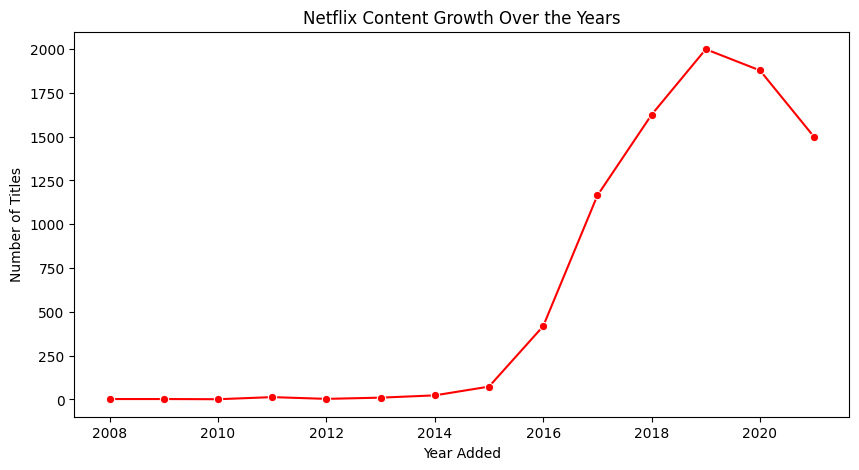

In [17]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color='red')
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


## 4️⃣ Top 10 Countries Producing Content

/tmp/ipython-input-939072831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='magma')


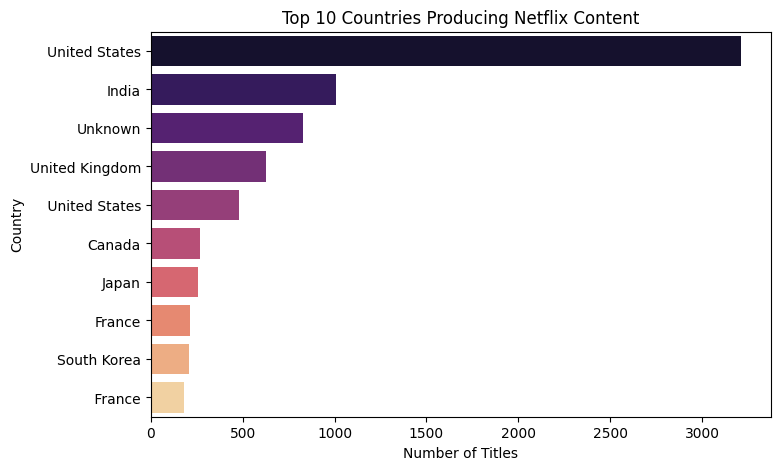

In [18]:
country_count = df['country'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=country_count.values, y=country_count.index, palette='magma')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


## 🌍 1️⃣ Pie Chart — Movies vs TV Shows

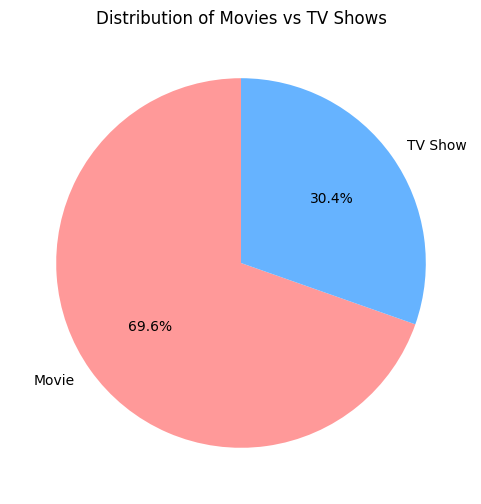

In [22]:
# Movies vs TV Shows Pie Chart
type_count = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Distribution of Movies vs TV Shows")
plt.show()



## 🕐 2️⃣ Bar Chart — Top 10 Release Years

/tmp/ipython-input-520146188.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_count.index, y=year_count.values, palette='plasma')


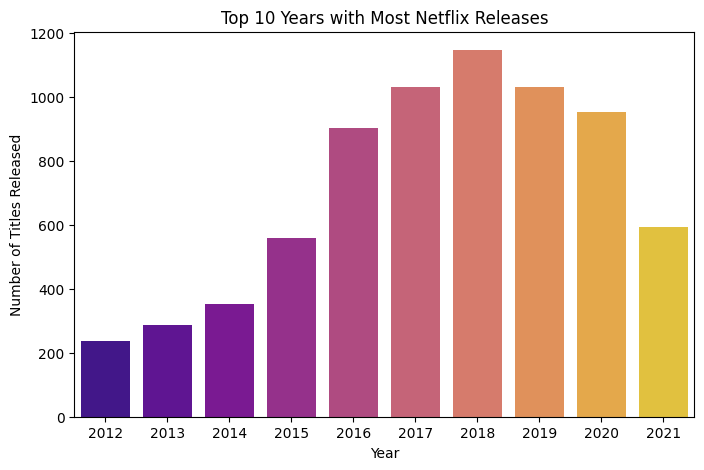

In [23]:
# Extract year from release_year column
year_count = df['release_year'].value_counts().head(10).sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_count.index, y=year_count.values, palette='plasma')
plt.title("Top 10 Years with Most Netflix Releases")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.show()


## 🎬 3️⃣ Bar Chart — Top 10 Directors

/tmp/ipython-input-2451129185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')


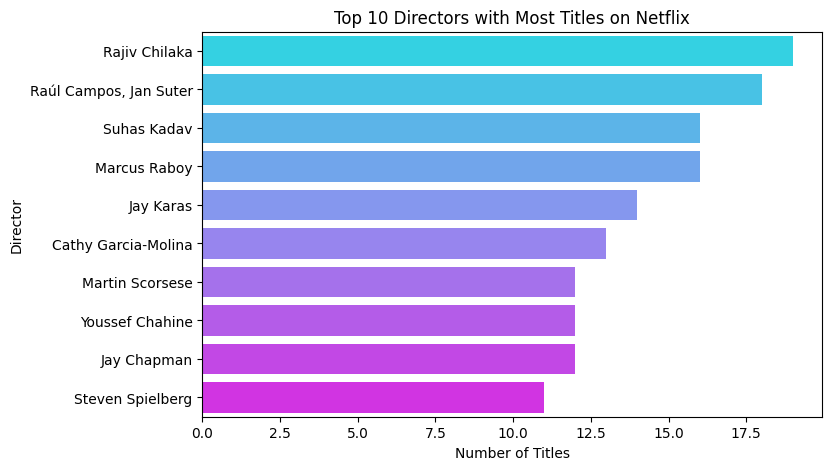

In [25]:
# Top 10 most frequent directors
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

